In [59]:
import warnings
warnings.filterwarnings('ignore')


In [60]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp


## ベルヌーイ分布

In [61]:
def bernoulli_sample(p, size=10):
    unif = np.random.rand(size) # 0-1の一様分布から生成
    return (unif <= p).astype(int)

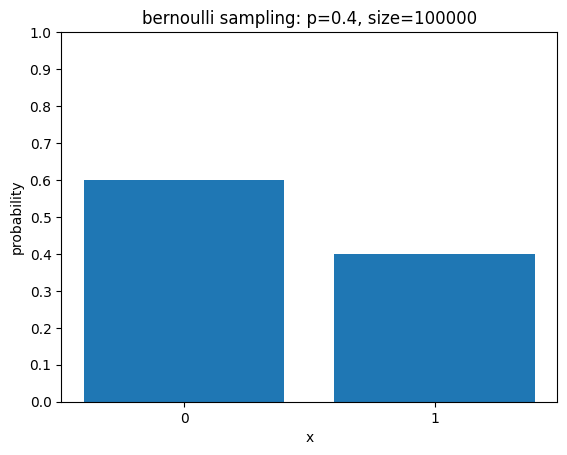

In [62]:
p, size = 0.4, 100000
sample = bernoulli_sample(p, size)
plt.bar([0, 1], [(sample == 0).sum() / size, (sample == 1).sum() / size])
plt.xticks([0, 1])
plt.yticks([0.1 * i for i in range(11)])
plt.xlabel('x')
plt.ylabel('probability')
plt.title(f'bernoulli sampling: p={p}, size={size}')
plt.savefig('../figures/bernoulli.jpg')
plt.show()

## ベータ分布

$a$と$b$を変えた場合

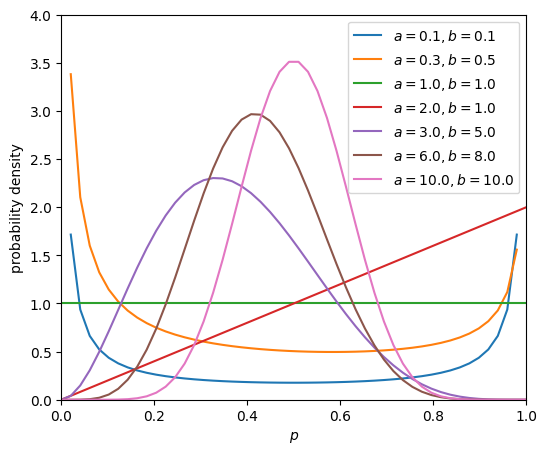

In [63]:
x = np.linspace(0, 1)
params = [
    [0.1, 0.1],
    [0.3, 0.5],
    [1.0, 1.0],
    [2.0, 1.0],
    [3.0, 5.0],
    [6.0, 8.0],
    [10.0, 10.0]
]
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)
for p in params:
    ax.plot(x, st.beta(p[0], p[1]).pdf(x), label=f'$a={p[0]},b={p[1]}$')
plt.xlim(0, 1)
plt.ylim(0, 4)
plt.xlabel('$p$')
plt.ylabel('probability density')
plt.legend()
plt.savefig('../figures/beta.jpg')
plt.show()


$\mu$を変化させた場合

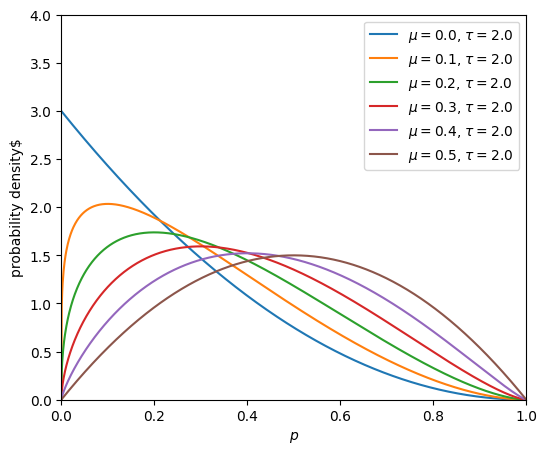

In [64]:
x = np.linspace(0, 1, 1000)
params = [
    [i * 0.1, 2.]
    for i in range(6)
]
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
for p in params:
  alpha, beta = p[1] * p[0], p[1] * (1-p[0])
  pdf = st.beta(1 + alpha, 1 + beta).pdf(x)
  ax.plot(x, pdf,label=f'$\mu={p[0]:.1f}$, $\\tau={p[1]:.1f}$')
plt.xlim(0, 1)
plt.ylim(0, 4)
plt.xlabel('$p$')
plt.ylabel('probability density$')
plt.legend()
plt.savefig('../figures/beta_mu.png')
plt.show()

$\tau$を変化させた場合

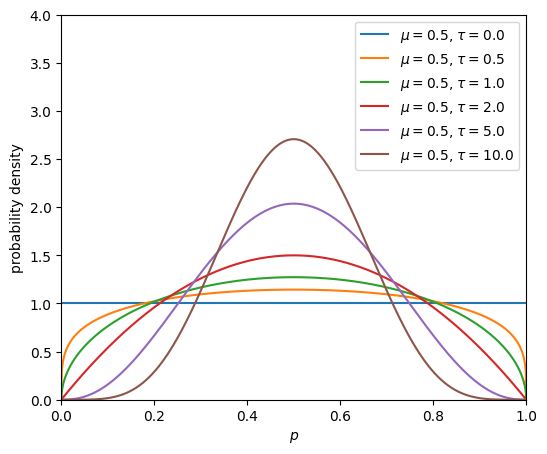

In [65]:
x = np.linspace(0, 1, 1000)
params = [
    [0.5, 0.0],
    [0.5, 0.5],
    [0.5, 1.],
    [0.5, 2],
    [0.5, 5],
    [0.5, 10]
]
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
for p in params:
  alpha, beta = p[1] * p[0], p[1] * (1-p[0])
  pdf = st.beta(1 + alpha, 1 + beta).pdf(x)
  ax.plot(x, pdf,label=f'$\mu={p[0]:.1f}$, $\\tau={p[1]:.1f}$')
plt.xlim(0, 1)
plt.ylim(0, 4)
plt.xlabel('$p$')
plt.ylabel('probability density')
plt.legend()
plt.savefig('../figures/beta_tau.png')
plt.show()

## 指数分布

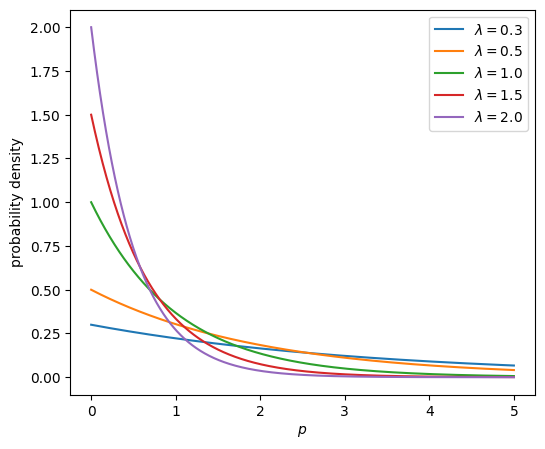

In [66]:
x = np.linspace(0, 5, 1000)
params = [0.3, 0.5, 1.0, 1.5, 2.0]
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111)
for p in params:
  pdf = st.expon(scale=1 / p).pdf(x)
  ax.plot(x, pdf, label=f'$\lambda={p:.1f}$')
# plt.xlim(0, 1)
# plt.ylim(0, 4)
plt.xlabel('$p$')
plt.ylabel('probability density')
plt.legend()
plt.savefig('../figures/expon.png')
plt.show()